<a href="https://colab.research.google.com/github/vimalkumarasamy/computer_vision/blob/master/Panorama_simplified.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
cd '/content/gdrive/My Drive/Computer_Vision/panorama'

/content/gdrive/My Drive/Computer_Vision/panorama


In [0]:
import os
import cv2
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
import numpy as np
# ! pip uninstall opencv python
# ! pip install opencv-python==3.4.2.17
# ! pip install opencv-contrib-python==3.4.2.17

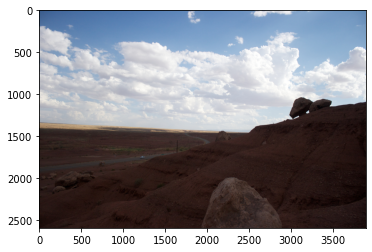

In [4]:
files=os.listdir(os.getcwd()+'/photos')
img=cv2.imread(os.getcwd()+'/photos/'+files[0])[:,:,::-1]
plt.imshow(img)
plt.show()

In [0]:
img_1 = cv.imread(os.getcwd()+'/photos/'+files[0],1)
sift = cv.xfeatures2d.SIFT_create()
kp_1,des_1 = sift.detectAndCompute(img_1,None)
img_2 = cv.imread(os.getcwd()+'/photos/'+files[2],1)
sift = cv.xfeatures2d.SIFT_create()
kp_2,des_2 = sift.detectAndCompute(img_2,None)


In [0]:
def ssd(arr1,arr2):
  import numpy as np
  return np.sum(np.square(arr1-arr2))

In [0]:
def match_keypoints(des_1,des_2):
  ratios=[]
  matches=[]
  for i in range(len(des_2)):
    arr=[]
    for j in range(len(des_1)):
      arr=arr+[ssd(des_2[i],des_1[j])]
    arr=np.array(arr)
    ind=arr.argsort()[0:2]
    ind1,ind2=ind[0],ind[1]
    val1,val2=arr[ind1],arr[ind2]
    ratio=val1/val2
    ratios=ratios+[ratio]
    matches=matches+[ind1] 
  top5=np.array(ratios).argsort()[0:10]
  best_match=[]
  for i in top5:
    best_match=best_match+[[i,matches[i]]]
  return(best_match)

In [0]:
coords=match_keypoints(des_1,des_2)

In [11]:
coords

[[273, 617],
 [408, 724],
 [304, 631],
 [274, 618],
 [769, 1031],
 [324, 649],
 [621, 912],
 [439, 777],
 [138, 491],
 [139, 492]]

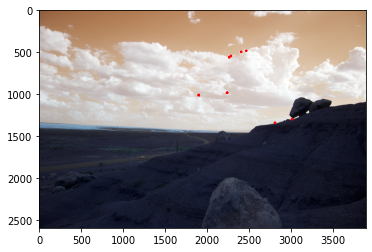

In [12]:
import matplotlib.pyplot as plt
from matplotlib.patches import Arrow, Circle
fig, ax = plt.subplots(1)
ax.imshow(img_1)
for i in coords:
  left=kp_1[i[1]].pt
  ax.add_patch(Circle((left[0], left[1]), radius=10, color='red'))
plt.show(fig)

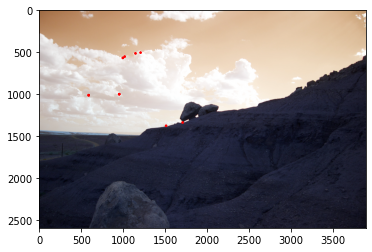

In [13]:
import matplotlib.pyplot as plt
from matplotlib.patches import Arrow, Circle
fig, ax = plt.subplots(1)
ax.imshow(img_2)
for i in coords:
  right=kp_2[i[0]].pt
  ax.add_patch(Circle((right[0], right[1]), radius=10, color='red'))
plt.show(fig)


In [0]:
R,L,R_final,L_final=[],[],[],[]
for i in coords:
  R.append(kp_2[i[0]].pt)
  L.append(kp_1[i[1]].pt)
for i in range(len(R)):
  if len(R_final)<5:
    if R[i] not in R_final and L[i] not in L_final:
      R_final.append(R[i])
      L_final.append(L[i])
L=L_final
R=R_final

In [0]:
x1_=R[0][0]
y1_=R[0][1]
x2_=R[1][0]
y2_=R[1][1]
x3_=R[2][0]
y3_=R[2][1]
x4_=R[3][0]
y4_=R[3][1]
x1 =L[0][0]
y1 =L[0][1]
x2 =L[1][0]
y2 =L[1][1]
x3 =L[2][0]
y3 =L[2][1]
x4 =L[3][0]
y4 =L[3][1]

In [0]:
PH=np.array([[-x1,-y1,-1,0,0,0,(x1*x1_),(y1*x1_),(x1_)], [0,0,0,-x1,-y1,-1,(x1*y1_),(y1*y1_),y1_],[-x2,-y2,-1,0,0,0,(x2*x2_),(y2*x2_),x2_],[0,0,0,-x2,-y2,-1,(x2*y2_),(y2*y2_),y2_],
             [-x3,-y3,-1,0,0,0,(x3*x3_),(y3*x3_),x3_],[0,0,0,-x3,-y3,-1,(x3*y3_),(y3*y3_),y3_],[-x4,-y4,-1,0,0,0,(x4*x4_),(y4*x4_),x4_],[0,0,0,-x4,-y4,-1,(x4*y4_),(y4*y4_),y4_],[0,0,0,0,0,0,0,0,1]])
Y=np.array([[0,0,0,0,0,0,0,0,1]])
PH_inv = np.linalg.pinv(PH)
H=np.matmul(np.linalg.pinv(PH),np.transpose(Y))

In [0]:
Homograph=np.array([[H[0][0],H[1][0],H[2][0]],[H[3][0],H[4][0],H[5][0]],[H[6][0],H[7][0],H[8][0]]])

In [22]:
h, mask = cv2.findHomography(np.array(R),np.array(L))
h

array([[ 7.09912686e-01,  3.87674454e-02,  1.36584554e+03],
       [-1.14449016e-01,  9.02866060e-01,  1.20054421e+02],
       [-7.61727812e-05,  2.05410912e-06,  1.00000000e+00]])

In [23]:
Homograph

array([[ 1.39405575e+00, -5.68504800e-02, -1.89509404e+03],
       [ 1.61725779e-01,  1.25745123e+00, -3.70277420e+02],
       [ 1.05301599e-04, -7.73678603e-06,  1.00000000e+00]])

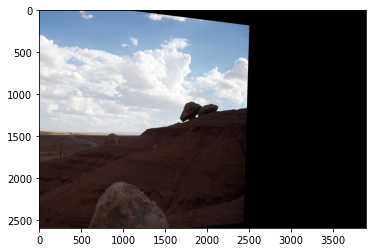

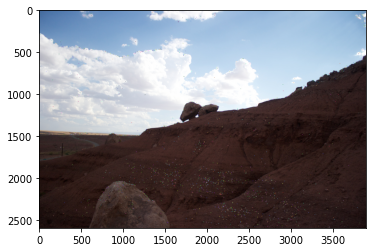

In [26]:
out = cv2.warpPerspective(img, Homograph, (b,l))
plt.imshow(out)
plt.show()
plt.imshow(img_2)
plt.show()

In [0]:
l,b,h=img.shape

In [0]:
H_=np.linalg.inv(Homograph)

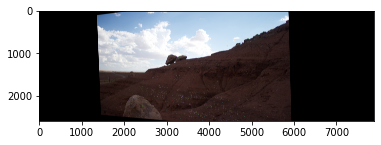

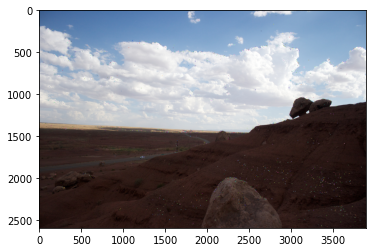

In [32]:
out = cv2.warpPerspective(img_2, H_, (b+4000,l))
plt.imshow(out)
plt.show()
plt.imshow(img_1)
plt.show()